# HOUSING: PRICE PREDICTION
Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.
Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file

In [1]:
#Importing required packages & libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the train and test datasets
df_train=pd.read_csv(r"C:\Users\HP\Desktop\Project-Housing_splitted\train.csv")

df_test=pd.read_csv(r"C:\Users\HP\Desktop\Project-Housing_splitted\test.csv")


print("Train dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

Train dataset shape: (1168, 81)
Test dataset shape: (292, 80)


So, we can see the trainng dataset has 1168 rows and 81 columns, whereas the test dataset has 292 rows and 80 columns. 

In [3]:
# Maintain the Ids for submission
train_id = df_train['Id']
test_id = df_test['Id']

In [4]:
#printing the head of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
#printing the head of the dataset
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

We can see there are several columns that has null values. We will treat them. 

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

We can see there are several columns that has null values. We will treat them. 

In [8]:
# displays all the rows in the dataset
pd.set_option("display.max_rows",None)

In [9]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# It seems we have nulls so we will use the imputer strategy later on.
Missing = pd.concat([df_train.isnull().sum(), df_test.isnull().sum()], axis=1, keys=['train', 'test'])
Missing[Missing.sum(axis=1) > 0]

,train,test
LotFrontage,214,45.0
Alley,1091,278.0
MasVnrType,7,1.0
MasVnrArea,7,1.0
BsmtQual,30,7.0
BsmtCond,30,7.0
BsmtExposure,31,7.0
BsmtFinType1,30,7.0
BsmtFinType2,31,7.0
Electrical,0,1.0


In [12]:
# We have several columns that contains null values we should replace them with the median or mean those null values.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [13]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


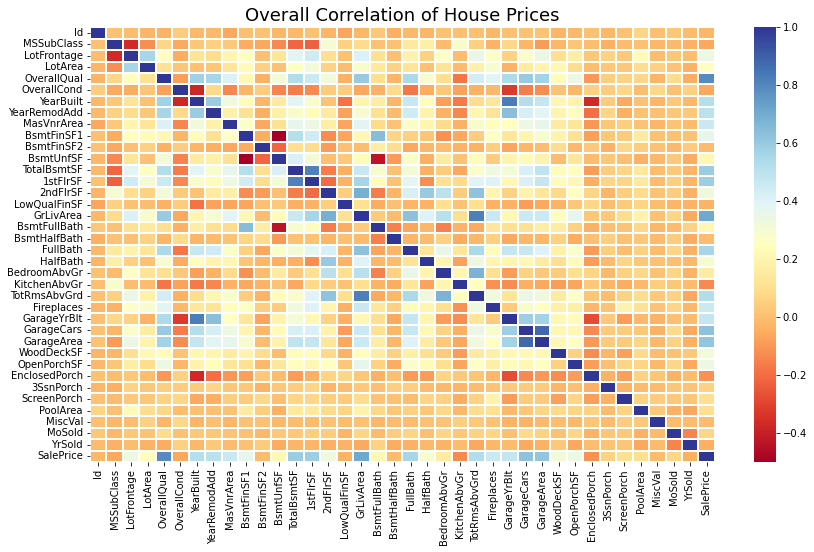

In [14]:
corr = df_train.corr()
plt.figure(figsize=(14,8))
plt.title('Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr,annot=False,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':20})
plt.show()

Splitting the Variables into Different Categories:

Data Analysis:
For data analysis purposes I am going to separate the different features into different categories in order to segment our analysis. These are the steps we are going to take in our analysis: Nevertheless, I will split the categories so you can analyse thoroughly the different categories.
1) Separate into different categories in order to make our analysis easier.
2) All of our categories will contain sales price in order to see if there is a significant pattern.
3) After that we will create our linear regression model in order to make accurate predictions as to what will the price of the houses will be.

4) For all the categories we have id, salesprice, MoSold, YearSold, SaleType and SaleCondition.

Note: At least for me, it is extremely important to make a data analysis of our data, in order to have a grasp of what the data is telling us, what might move salesprice higher or lower. Instead of just running a model and just predict prices, we must make a thorough analysis of our data. Also, using these different categories is completely optional in case you want to make a more in-depth analysis of the different features.

In [17]:
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df_train.dtypes == 'int')
num_cols = list(s[s].index)
print("Integer variables:")
print(num_cols)

s = (df_train.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
[]
Real variables:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


Missing Values:
Combine training and test data into a single dataframe

In [19]:
df = [df_train,df_test]
df_combined = pd.concat(df).reset_index(drop=True)

In [20]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0


In [21]:
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:title={'center':'Heatmap of missing values'}>

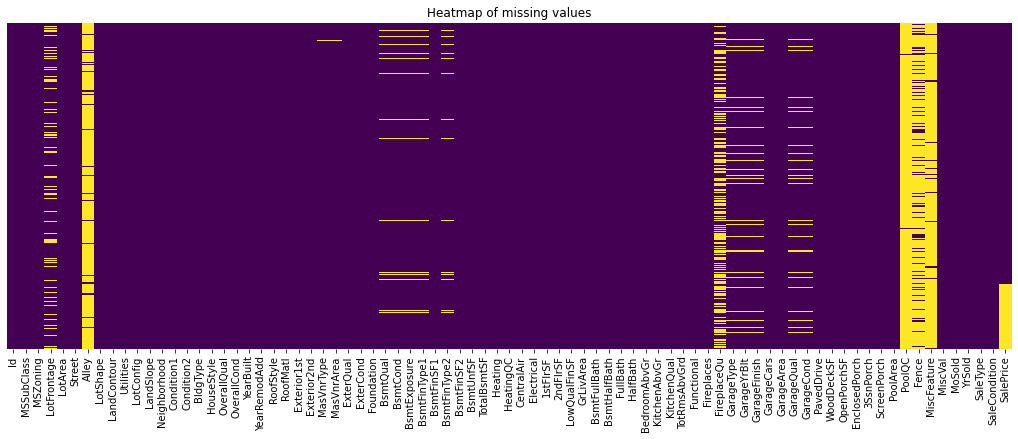

In [22]:
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(df_combined.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

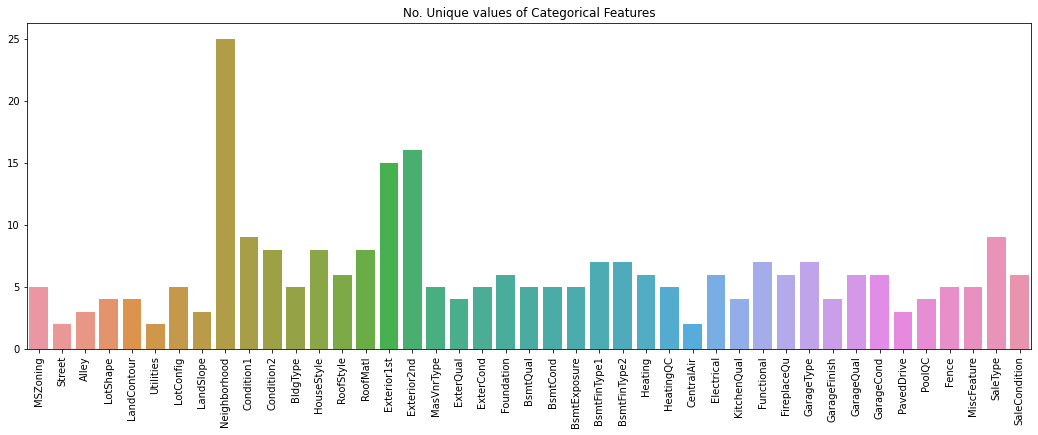

In [23]:
unique_values = []
for col in object_cols:
  unique_values.append(df_combined[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

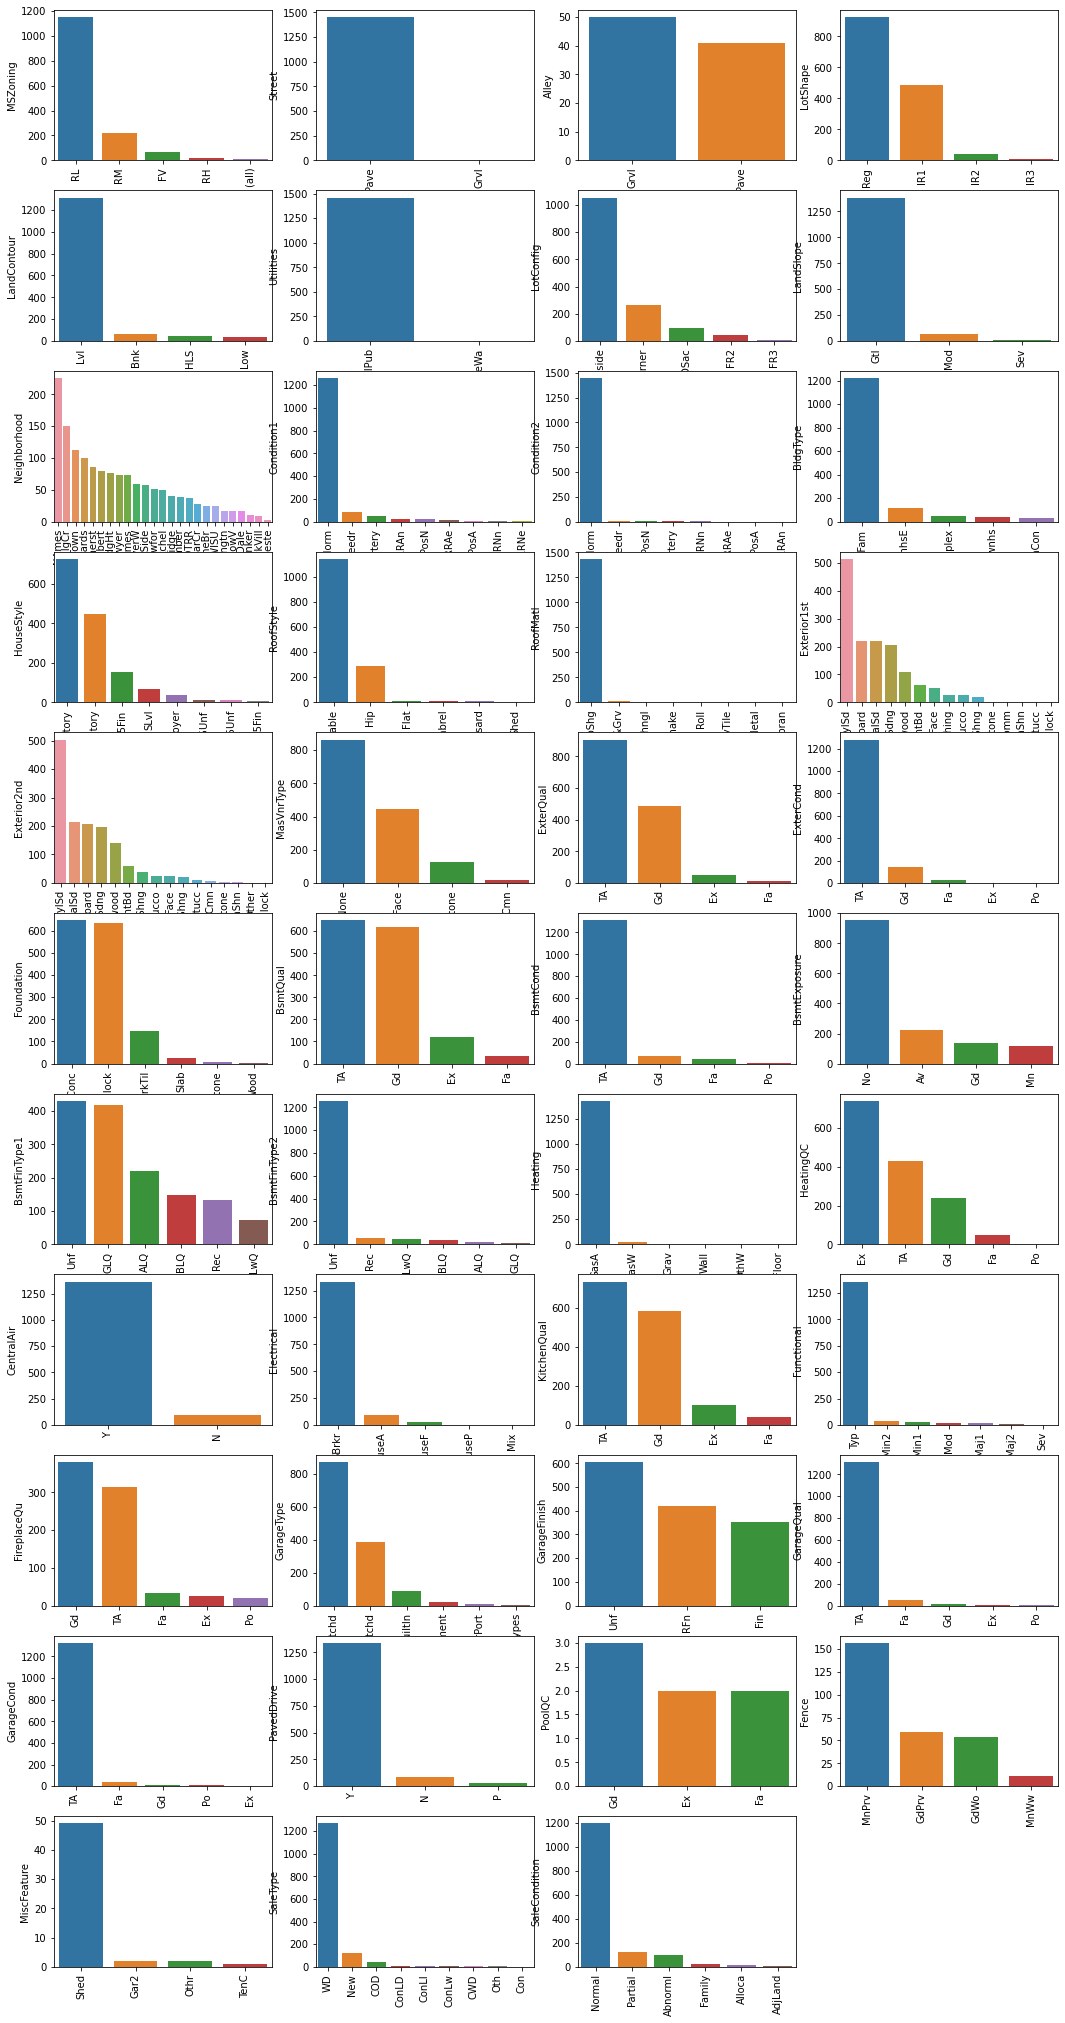

In [24]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
  y = df_combined[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


Fill up missing values:
Drop the features 'Alley', 'Fence', and 'MiscFeature'.

Drop 'Utilities' feature, as all but one have the value 'AllPub'

All entries with missing 'FirePlaceQu' have 'Fireplaces' = 0. Hence fill missing values with 'NA'.

All but one entries with missing 'PoolQC' value have 'PoolArea' = 0. Use mode for missing value with non-zero PoolArea. Use 'NA' for the rest of the entries.

Basement features: Fill missing values with 'NA' or '0'.

Garage features: Fill missing values with 'NA' or '0'.

Remaining Integer and Real features: fill up missing values with mean of the corresponding feature.

Remaining Categorical features: fill up missing values with mode of the corresponding feature.

In [25]:
df_combined.drop(columns='Id',inplace=True); print('Drop Id \n')
df_combined['MSZoning'] = df_combined['MSZoning'].fillna(df_combined['MSZoning'].mode()[0])
df_combined['LotFrontage'] = df_combined['LotFrontage'].fillna(df_combined['LotFrontage'].mean())
df_combined.drop(columns='Alley',inplace=True); print('Drop Alley \n')

#df_combined['Utilities'] = df_combined['Utilities'].fillna(df_combined['Utilities'].mode()[0])
print(df_combined['Utilities'].value_counts())
df_combined.drop(columns='Utilities',inplace=True); print('Drop Utilities \n')

df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])
df_combined['MasVnrType'] = df_combined['MasVnrType'].fillna(df_combined['MasVnrType'].mode()[0])
df_combined['MasVnrArea'] = df_combined['MasVnrArea'].fillna(df_combined['MasVnrArea'].mean())
df_combined['Electrical'] = df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna(df_combined['KitchenQual'].mode()[0])
df_combined['Functional'] = df_combined['Functional'].fillna(df_combined['Functional'].mode()[0])

#df_combined.loc[(df_combined['Fireplaces'] != 0) & (df_combined['FireplaceQu'].isnull()) ][['FireplaceQu','Fireplaces']]
df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna('NA'); print('FirePlaceQu: Fill NA values for missing values \n')

df_combined.loc[(df_combined['PoolQC'].isnull()) & df_combined['PoolArea']>0][['PoolQC','PoolArea']]
df_combined.at[2599,'PoolQC'] = df_combined['PoolQC'].mode()[0]; print('PoolQC: Use mode for missing value with non-zero PoolAre \n')
df_combined['PoolQC'] = df_combined['PoolQC'].fillna('NA'); print('PoolQC: Use NA for remaining missing values \n')

df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0],inplace=True)
df_combined.drop(columns=['Fence','MiscFeature','SalePrice'],inplace=True); print('Drop Fence, MiscFeature and SalePrice\n')

# Basement Features
#df_combined.loc[df_combined['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].head()
#df_combined.loc[df_combined['TotalBsmtSF'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]
print('Fill missing values of Basement features with NA or 0 \n')
df_combined['BsmtQual'] = df_combined['BsmtQual'].fillna('NA')
df_combined['BsmtCond'] = df_combined['BsmtCond'].fillna('NA')
df_combined['BsmtExposure'] = df_combined['BsmtExposure'].fillna('NA')
df_combined['BsmtFinType1'] = df_combined['BsmtFinType1'].fillna('NA')
df_combined['BsmtFinType2'] = df_combined['BsmtFinType2'].fillna('NA')

df_combined['BsmtFinSF1'] = df_combined['BsmtFinSF1'].fillna(int(0))
df_combined['BsmtFinSF2'] = df_combined['BsmtFinSF2'].fillna(int(0))
df_combined['BsmtUnfSF'] = df_combined['BsmtUnfSF'].fillna(int(0))
df_combined['TotalBsmtSF'] = df_combined['TotalBsmtSF'].fillna(int(0))
df_combined['BsmtFullBath'] = df_combined['BsmtFullBath'].fillna(int(0))
df_combined['BsmtHalfBath'] = df_combined['BsmtHalfBath'].fillna(int(0))

# Garage Features
# df_combined.loc[df_combined['GarageCond'].isnull()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()
print('Fill missing values of Garage features with NA or 0 \n')
df_combined['GarageType'] = df_combined['GarageType'].fillna('NA')
df_combined['GarageFinish'] = df_combined['GarageFinish'].fillna('NA')
df_combined['GarageCond'] = df_combined['GarageCond'].fillna('NA')
df_combined['GarageQual'] = df_combined['GarageQual'].fillna('NA')
df_combined['GarageCars'] = df_combined['GarageCars'].fillna(int(0))
df_combined['GarageArea'] = df_combined['GarageArea'].fillna(int(0))
df_combined['GarageYrBlt'] = df_combined['GarageYrBlt'].fillna(int(0))

Drop Id 

Drop Alley 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Drop Utilities 

FirePlaceQu: Fill NA values for missing values 

PoolQC: Use mode for missing value with non-zero PoolAre 

PoolQC: Use NA for remaining missing values 

Drop Fence, MiscFeature and SalePrice

Fill missing values of Basement features with NA or 0 

Fill missing values of Garage features with NA or 0 



In [26]:
df_combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,120.0,RL,70.049958,4928.0,Pave,IR1,Lvl,Inside,Gtl,NPkVill,...,0.0,0.0,0.0,0.0,NA,0.0,2.0,2007.0,WD,Normal
1,20.0,RL,95.000000,15865.0,Pave,IR1,Lvl,Inside,Mod,NAmes,...,0.0,0.0,224.0,0.0,NA,0.0,10.0,2007.0,WD,Normal
2,60.0,RL,92.000000,9920.0,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,...,0.0,0.0,0.0,0.0,NA,0.0,6.0,2007.0,WD,Normal
3,20.0,RL,105.000000,11751.0,Pave,IR1,Lvl,Inside,Gtl,NWAmes,...,0.0,0.0,0.0,0.0,NA,0.0,1.0,2010.0,COD,Normal
4,20.0,RL,70.049958,16635.0,Pave,IR1,Lvl,FR2,Gtl,NWAmes,...,0.0,0.0,0.0,0.0,NA,0.0,6.0,2009.0,WD,Normal


Check that all missing values have been taken care of.

In [27]:
print(df_combined.isnull().sum().sum())

55


In [28]:
df_combined.isnull().sum()

MSSubClass       1
MSZoning         1
LotFrontage      1
LotArea          1
Street           1
LotShape         1
LandContour      1
LotConfig        1
LandSlope        1
Neighborhood     1
Condition1       1
Condition2       1
BldgType         1
HouseStyle       1
OverallQual      1
OverallCond      1
YearBuilt        1
YearRemodAdd     1
RoofStyle        1
RoofMatl         1
Exterior1st      1
Exterior2nd      1
MasVnrType       1
MasVnrArea       1
ExterQual        1
ExterCond        1
Foundation       1
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          1
HeatingQC        1
CentralAir       1
Electrical       1
1stFlrSF         1
2ndFlrSF         1
LowQualFinSF     1
GrLivArea        1
BsmtFullBath     0
BsmtHalfBath     0
FullBath         1
HalfBath         1
BedroomAbvGr     1
KitchenAbvGr     1
KitchenQual      1
TotRmsAbvGrd     1
Functional  

In [35]:
# Converting non-numeric predictors stored as numbers into string

df_combined['MSSubClass'] = df_combined['MSSubClass'].apply(str)
df_combined['YrSold'] = df_combined['YrSold'].apply(str)
df_combined['MoSold'] = df_combined['MoSold'].apply(str)
df_combined['MSZoning'] = df_combined['MoSold'].apply(str)


# Filling Categorical NaN (That we know how to fill due to the description file )

df_combined['Functional'] = df_combined['Functional'].fillna('Typ')
df_combined['Electrical'] = df_combined['Electrical'].fillna("SBrkr")
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna("TA")
df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])
df_combined['SaleType'] = df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0])
df_combined["PoolQC"] = df_combined["PoolQC"].fillna("None")

df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna("None")



for col in ('GarageArea', 'GarageCars'):
    df_combined[col] = df_combined[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_combined[col] = df_combined[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_combined[col] = df_combined[col].fillna('None')
    
    # Checking the features with NaN remained out

for col in df_combined:
    if df_combined[col].isna().sum() > 0:
        print(df_combined[col][0])

RL
70.04995836802665
4928.0
Pave
IR1
Lvl
Inside
Gtl
NPkVill
Norm
Norm
TwnhsE
1Story
6.0
5.0
1976.0
1976.0
Gable
CompShg
None
0.0
TA
TA
CBlock
GasA
TA
Y
958.0
0.0
0.0
958.0
2.0
0.0
2.0
1.0
5.0
1.0
Y
0.0
205.0
0.0
0.0
0.0
0.0
0.0
Normal


In [36]:
print(df_combined.isnull().sum().sum())

46


In [37]:
df_combined.isnull().sum()

MSSubClass       0
MSZoning         1
LotFrontage      1
LotArea          1
Street           1
LotShape         1
LandContour      1
LotConfig        1
LandSlope        1
Neighborhood     1
Condition1       1
Condition2       1
BldgType         1
HouseStyle       1
OverallQual      1
OverallCond      1
YearBuilt        1
YearRemodAdd     1
RoofStyle        1
RoofMatl         1
Exterior1st      0
Exterior2nd      0
MasVnrType       1
MasVnrArea       1
ExterQual        1
ExterCond        1
Foundation       1
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          1
HeatingQC        1
CentralAir       1
Electrical       0
1stFlrSF         1
2ndFlrSF         1
LowQualFinSF     1
GrLivArea        1
BsmtFullBath     0
BsmtHalfBath     0
FullBath         1
HalfBath         1
BedroomAbvGr     1
KitchenAbvGr     1
KitchenQual      0
TotRmsAbvGrd     1
Functional  

In [39]:
#removing any white spaces from data
data_w = df_combined.copy()
data_w.columns = data_w.columns.str.replace(' ', '') # Replacing the white spaces in columns' names
data_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 2599
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1461 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   float64
 15  OverallCond    1460 non-null   float64
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   float64
 18  RoofStyl

In [40]:
df_combined.shape

(1461, 75)

In [41]:
#drop the null values from the train data and rechecking for null values
df_combined.dropna(inplace=True)

df_combined.isnull().sum() #checking null values

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [42]:
df_combined.shape

(1460, 75)

Data Preprocessing
Import Onehot encoder to encode categorical features

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
s = (df_combined.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
No. of. categorical features:  42


In [45]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_combined[object_cols]))
OH_cols.index = df_combined.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = df_combined.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [46]:
df_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,x40_ConLw,x40_New,x40_Oth,x40_WD,x41_Abnorml,x41_AdjLand,x41_Alloca,x41_Family,x41_Normal,x41_Partial
0,70.049958,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,958.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,95.000000,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,823.0,1043.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,92.000000,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,255.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,105.000000,11751.0,6.0,6.0,1977.0,1977.0,480.0,705.0,0.0,1139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,70.049958,16635.0,6.0,7.0,1977.0,2000.0,126.0,1246.0,0.0,356.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Check that the shapes are consistent

print('df_final shape:', df_final.shape)
print('df_train shape:', df_train.shape)
print('df_test shape:',  df_test.shape)

X_train = pd.DataFrame(df_final[:1460])
X_test  = pd.DataFrame(df_final[1460:])
Y_train = df_train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:',  X_test.shape)

df_final shape: (1460, 316)
df_train shape: (1168, 81)
df_test shape: (292, 80)

Check that the datasets are consistent:

X_train shape (1460, 316)
Y_train shape: (1168,)
X_test shape: (0, 316)


In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size=0.8, test_size=0.2,random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1168]

In [52]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1168]